In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a path to the csv and read it into a Pandas DataFrame for Poverty Rate Data
csv_path = "CountyPovertyRate.csv"
county_pov_df = pd.read_csv(csv_path)

county_pov_df.head()

,Rank,County,Poverty Rate,Urban/Rural/Sub
0,1st,Carver County,4.00%,Suburban
1,2nd,Washington County,5.00%,Suburban
2,3rd,Wright County,5.00%,Suburban
3,4th,Chisago County,5.40%,Rural
4,5th,Scott County,5.60%,Suburban


In [3]:
#Create path to csv for nitrate 2017 data and read into Pandas Dataframe
csv_path = "nitrate_2017.csv"
nitrate2017_df= pd.read_csv(csv_path)

nitrate2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips,Unnamed: 11
0,1010001,2017.0,Nitrate,Aitkin,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),2165.0,27001.0,NaN
1,1010002,2017.0,Nitrate,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),45.0,27001.0,NaN
2,1010019,2017.0,Nitrate,Why-Not Park,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),25.0,27001.0,NaN
3,1010011,2017.0,Nitrate,Hill City,Aitkin,Hill City,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),633.0,27001.0,NaN
4,1010016,2017.0,Nitrate,McGregor,Aitkin,McGregor,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),394.0,27001.0,NaN


In [4]:
#verify data types in pandas database for Nitrate
nitrate2017_df.dtypes

pwsId                object
year                float64
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
mean                 object
max                  object
populationServed    float64
fips                float64
Unnamed: 11         float64
dtype: object

In [5]:
#delete the empty column on the end named "Unnamed:11"
nitrate2017_df=nitrate2017_df.drop(columns=['Unnamed: 11'])
nitrate2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Nitrate,Aitkin,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),2165.0,27001.0
1,1010002,2017.0,Nitrate,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),45.0,27001.0
2,1010019,2017.0,Nitrate,Why-Not Park,Aitkin,Aitkin,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),25.0,27001.0
3,1010011,2017.0,Nitrate,Hill City,Aitkin,Hill City,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),633.0,27001.0
4,1010016,2017.0,Nitrate,McGregor,Aitkin,McGregor,Groundwater,0.025 mg/L (ND),0.025 mg/L (ND),394.0,27001.0


In [6]:
#verify any empty data cells
nitrate2017_df['mean'].isnull().sum()

10

In [7]:
#verify what is in the empty data cells
nullData=nitrate2017_df.loc[nitrate2017_df['mean'].isnull()]
nullData

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
963,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
964,Minnesota Public Health Data Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,Minnesota Environmental Public Health Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,Minnesota Department of Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,P.O. Box 64882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,"St. Paul, MN 55164-0882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,Phone: (651) 201-5900 or toll free: 1-800-205-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,Fax: (651) 201-5926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971,E-mail: tracking.health@state.mn.us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
972,Web: http://health.mn.gov/mndata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#delete the null data and confirm no more NaN
nitrate2017_df=nitrate2017_df.dropna()
nitrate2017_df['mean'].isnull().sum()

0

In [9]:
#drop concentration string out of contaminate level columns "mean" and "max"
nitrate2017_df['mean']=nitrate2017_df['mean'].str.split(" ").str[0]
nitrate2017_df['max']=nitrate2017_df['max'].str.split(" ").str[0]
nitrate2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,2017.0,Nitrate,Aitkin,Aitkin,Aitkin,Groundwater,0.025,0.025,2165.0,27001.0
1,1010002,2017.0,Nitrate,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.025,0.025,45.0,27001.0
2,1010019,2017.0,Nitrate,Why-Not Park,Aitkin,Aitkin,Groundwater,0.025,0.025,25.0,27001.0
3,1010011,2017.0,Nitrate,Hill City,Aitkin,Hill City,Groundwater,0.025,0.025,633.0,27001.0
4,1010016,2017.0,Nitrate,McGregor,Aitkin,McGregor,Groundwater,0.025,0.025,394.0,27001.0


In [10]:
#rename column headers for contaminates to include concentrations so the information isn't lost
nitrate2017_df=nitrate2017_df.rename(columns={"mean":"Mean mg/L (ND)", "max":"Max mg/L (ND)"})
nitrate2017_df.head()

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,Mean mg/L (ND),Max mg/L (ND),populationServed,fips
0,1010001,2017.0,Nitrate,Aitkin,Aitkin,Aitkin,Groundwater,0.025,0.025,2165.0,27001.0
1,1010002,2017.0,Nitrate,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.025,0.025,45.0,27001.0
2,1010019,2017.0,Nitrate,Why-Not Park,Aitkin,Aitkin,Groundwater,0.025,0.025,25.0,27001.0
3,1010011,2017.0,Nitrate,Hill City,Aitkin,Hill City,Groundwater,0.025,0.025,633.0,27001.0
4,1010016,2017.0,Nitrate,McGregor,Aitkin,McGregor,Groundwater,0.025,0.025,394.0,27001.0


In [11]:
#convert contaminate columns from object to integer, confirm data type in columns
nitrate2017_df["Mean mg/L (ND)"] = pd.to_numeric(nitrate2017_df["Mean mg/L (ND)"])
nitrate2017_df["Max mg/L (ND)"] = pd.to_numeric(nitrate2017_df["Max mg/L (ND)"])

#covert year to string
nitrate2017_df["year"] = nitrate2017_df["year"].astype(str)
print(nitrate2017_df.dtypes)

pwsId                object
year                 object
analyteCode          object
pwsName              object
countyServed         object
cityServed           object
waterSource          object
Mean mg/L (ND)      float64
Max mg/L (ND)       float64
populationServed    float64
fips                float64
dtype: object


In [12]:
#convert county columns of the two data frames to match each other for a future merge
nitrate2017_df=nitrate2017_df.rename(columns={"countyServed" : "County"})
county_pov_df['County']=county_pov_df['County'].str.split(" County").str[0]


In [13]:
#average mean concentration for each county
county_grouped = nitrate2017_df.groupby(["County"]) 
mean_concentration = county_grouped.mean()["Mean mg/L (ND)"]

In [14]:
#Create new data frame from mean concentration
ByCounty_df = pd.DataFrame(mean_concentration)
ByCounty_df = ByCounty_df.reset_index()
ByCounty_df.head()

,County,Mean mg/L (ND)
0,Aitkin,0.025000
1,Anoka,0.116419
2,Becker,1.521889
3,Beltrami,0.343063
4,Benton,2.058714


In [15]:
#calculate standard deviation for concentration for each county. Add to new dataframe
county_grouped = nitrate2017_df.groupby(["County"]) 
sd_concentration = county_grouped.std()["Mean mg/L (ND)"]

ByCounty1_df = pd.DataFrame(sd_concentration)
ByCounty1_df = ByCounty1_df.reset_index()
ByCounty1_df = ByCounty1_df.rename(columns = {"Mean mg/L (ND)":"Standard Deviation mg/L (ND)"})
ByCounty1_df.head()


,County,Standard Deviation mg/L (ND)
0,Aitkin,0.000000
1,Anoka,0.196687
2,Becker,2.841661
3,Beltrami,0.983462
4,Benton,2.301435


In [16]:
#merge the mean and standard deviation into the same data frame
avg_df = pd.merge(ByCounty_df,ByCounty1_df, on = "County", how = "inner")
avg_df.head()

,County,Mean mg/L (ND),Standard Deviation mg/L (ND)
0,Aitkin,0.025000,0.000000
1,Anoka,0.116419,0.196687
2,Becker,1.521889,2.841661
3,Beltrami,0.343063,0.983462
4,Benton,2.058714,2.301435


In [17]:
#merge mean/std dataframe with poverty rate data
county_combined = pd.merge(avg_df,county_pov_df, on = "County", how = "inner")
county_combined.head()

,County,Mean mg/L (ND),Standard Deviation mg/L (ND),Rank,Poverty Rate,Urban/Rural/Sub
0,Aitkin,0.025000,0.000000,60th,12.10%,Rural
1,Anoka,0.116419,0.196687,9th,6.60%,Suburban
2,Becker,1.521889,2.841661,67th,12.70%,Rural
3,Beltrami,0.343063,0.983462,86th,19.00%,Rural
4,Benton,2.058714,2.301435,74th,14.10%,Rural


In [18]:
#modify Poverty Rate column to be integer so it can be binned
county_combined['Poverty Rate']=county_combined['Poverty Rate'].str.split("%").str[0]
county_combined['Poverty Rate'] = pd.to_numeric(county_combined['Poverty Rate'])
county_combined = county_combined.rename(columns = {"Poverty Rate":"Poverty Rate (%)"})
county_combined.head()

,County,Mean mg/L (ND),Standard Deviation mg/L (ND),Rank,Poverty Rate (%),Urban/Rural/Sub
0,Aitkin,0.025000,0.000000,60th,12.1,Rural
1,Anoka,0.116419,0.196687,9th,6.6,Suburban
2,Becker,1.521889,2.841661,67th,12.7,Rural
3,Beltrami,0.343063,0.983462,86th,19.0,Rural
4,Benton,2.058714,2.301435,74th,14.1,Rural


In [19]:
#sort counties into 5 equal bins by poverty rate
bins = [0,8,10,11.55,13.4,24]
#will come back later for naming 
bin_names = ["1","2","3","4","5"]

county_combined["Bin Poverty Rate"] = pd.cut(county_combined["Poverty Rate (%)"],bins, labels = bin_names)
county_combined.head()

,County,Mean mg/L (ND),Standard Deviation mg/L (ND),Rank,Poverty Rate (%),Urban/Rural/Sub,Bin Poverty Rate
0,Aitkin,0.025000,0.000000,60th,12.1,Rural,4
1,Anoka,0.116419,0.196687,9th,6.6,Suburban,1
2,Becker,1.521889,2.841661,67th,12.7,Rural,4
3,Beltrami,0.343063,0.983462,86th,19.0,Rural,5
4,Benton,2.058714,2.301435,74th,14.1,Rural,5


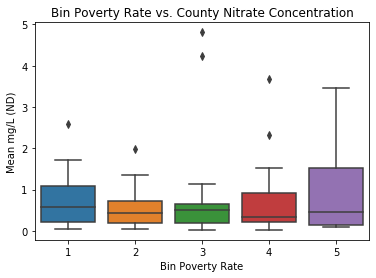

In [20]:
#graph boxplot of poverty rate vs. bin poverty rate
ax=sns.boxplot(x=county_combined["Bin Poverty Rate"], y=county_combined["Mean mg/L (ND)"])
ax.axes.set_title("Bin Poverty Rate vs. County Nitrate Concentration")
plt.savefig("boxplot_nitrate2017.png")
plt.show()

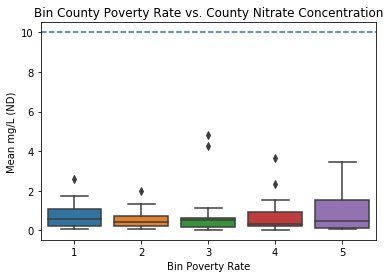

In [21]:
#The highest level of a contaminant that the EPA allows in public drinking water systems. 
#The EPA sets MCLs at levels that are economically and technologically feasible.
#Arsenic: 10 milligrams per liter (µg/L)
ax=sns.boxplot(x=county_combined["Bin Poverty Rate"], y=county_combined["Mean mg/L (ND)"])
ax.axes.set_title("Bin County Poverty Rate vs. County Nitrate Concentration")
ax.axhline(10, ls='--')
plt.savefig("boxplot_line_nitrate2017.png")
plt.show()

Correlation between Poverty Rate % vs. Nitrate Mean (ug/L):
0.01221032336395037


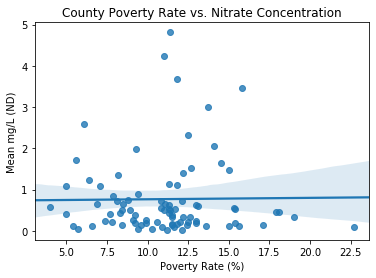

In [24]:
#plotting poverty rate vs. mean nitrate concentration to see if there is a correlation
ax = sns.regplot(x=county_combined["Poverty Rate (%)"], y=county_combined["Mean mg/L (ND)"])
ax.axes.set_title("County Poverty Rate vs. Nitrate Concentration")

#using function to calculate correlation factor
print("Correlation between Poverty Rate % vs. Nitrate Mean (ug/L):")
print(county_combined["Poverty Rate (%)"].corr(county_combined["Mean mg/L (ND)"]))

plt.savefig("regression_nitrate2017.png")
plt.show()

Correlation between Poverty Rate % vs. Nitrate Mean (ug/L):


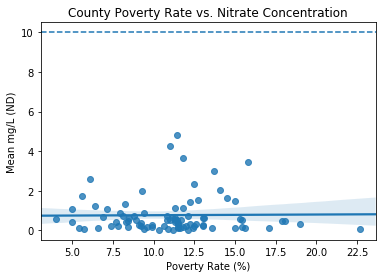

In [23]:
#plotting poverty rate vs. mean nitrate concentration to see if there is a correlation
ax = sns.regplot(x=county_combined["Poverty Rate (%)"], y=county_combined["Mean mg/L (ND)"])
ax.axes.set_title("County Poverty Rate vs. Nitrate Concentration")
ax.axhline(10, ls='--')

#using function to calculate correlation factor
print("Correlation between Poverty Rate % vs. Nitrate Mean (ug/L):")
county_combined["Poverty Rate (%)"].corr(county_combined["Mean mg/L (ND)"])


plt.savefig("regression_line_nitrate2017.png")
plt.show()